In [64]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224
passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question:

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). Dataset link: https://www.kaggle.com/c/titanic/data


In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data.drop(["Cabin"], axis=1, inplace=True)
test_data.drop(["Cabin"], axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


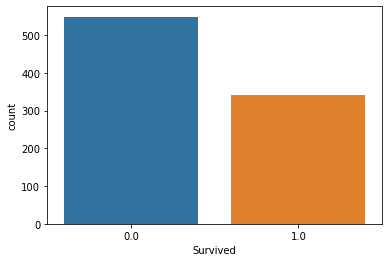

In [67]:
sns.countplot(train_data.Survived)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


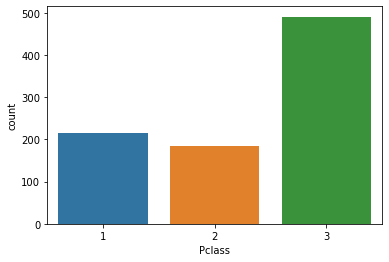

In [9]:
sns.countplot(train_data.Pclass)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


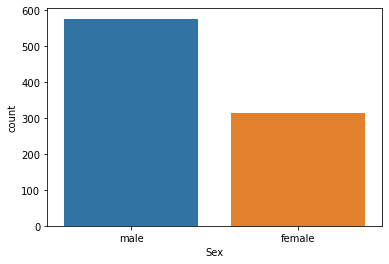

In [11]:
sns.countplot(train_data.Sex)
plt.show()

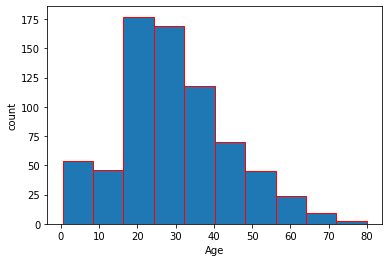

In [13]:
plt.hist(train_data.Age, edgecolor="red")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

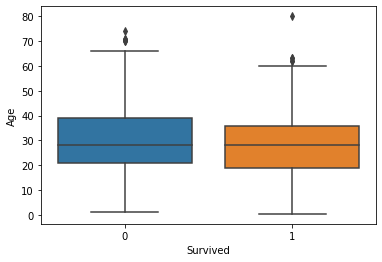

In [15]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


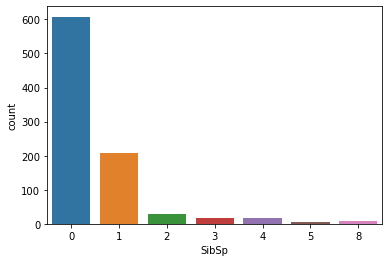

In [16]:
sns.countplot(train_data.SibSp)
plt.show()

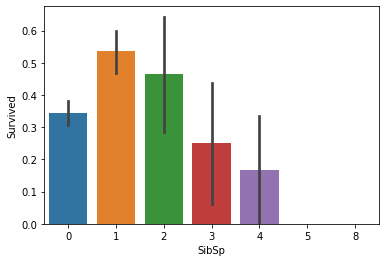

In [18]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.show()

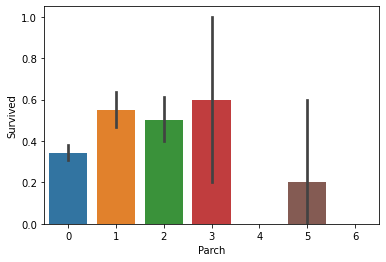

In [20]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.show()

In [21]:
train_data.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


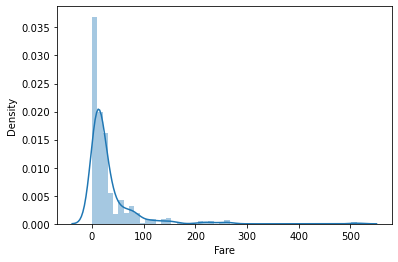

In [22]:
sns.distplot(train_data.Fare)
plt.show()

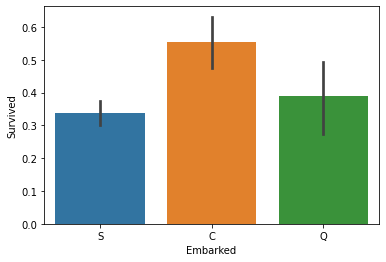

In [24]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.show()

In [26]:
train_data.Name.head(20)


0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [139]:
data = train_data.append(test_data)
data['Title'] = data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
data.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [140]:
Common_Title = ['Mr' 'Miss', 'Mrs', 'Master']
data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
data['Title'].replace(['Lady'], 'Mrs', inplace=True)
data['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
data['Title'][~data.Title.isin(Common_Title)] = 'Others'

C:\Users\User\AppData\Local\Temp/ipykernel_7000/3778645544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'][~data.Title.isin(Common_Title)] = 'Others'


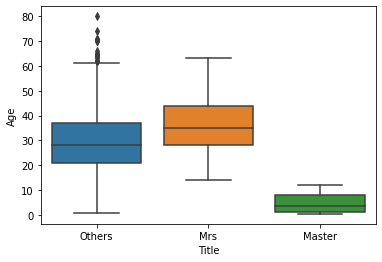

In [35]:
train_data = data[:len(train_data)]
test_data = data[len(train_data):]
sns.boxplot(x='Title', y='Age', data=train_data)
plt.show()

In [37]:
AgeMedian_by_titles = train_data.groupby('Title')['Age'].median()
AgeMedian_by_titles

Title
Master     3.5
Mrs       35.0
Others    28.0
Name: Age, dtype: float64

In [41]:
for title in AgeMedian_by_titles.index:
    train_data['Age'][(train_data.Age.isnull()) & (train_data.Title == title)] = AgeMedian_by_titles[title]
    test_data['Age'][(test_data.Age.isnull()) & (test_data.Title == title)] = AgeMedian_by_titles[title]

C:\Users\User\AppData\Local\Temp/ipykernel_7000/741424147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'][(train_data.Age.isnull()) & (train_data.Title == title)] = AgeMedian_by_titles[title]
C:\Users\User\AppData\Local\Temp/ipykernel_7000/741424147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'][(test_data.Age.isnull()) & (test_data.Title == title)] = AgeMedian_by_titles[title]


In [44]:
train_data['Embarked'].fillna(train_data.Embarked.mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [46]:
train_data.Fare.sort_values(ascending=False).head(10)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [48]:
train_data.loc[train_data.Fare>512, 'Fare'] = 263
train_data.Fare.sort_values(ascending=False).head(10)

258    263.0000
88     263.0000
27     263.0000
341    263.0000
737    263.0000
438    263.0000
679    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [55]:
train_data['Sex_Code'] = train_data['Sex'].map({'female':1, 'male':0}).astype('int')
test_data['Sex_Code'] = test_data['Sex'].map({'female':1, 'male':0}).astype('int')


C:\Users\User\AppData\Local\Temp/ipykernel_7000/2485555887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex_Code'] = train_data['Sex'].map({'female':1, 'male':0}).astype('int')
C:\Users\User\AppData\Local\Temp/ipykernel_7000/2485555887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex_Code'] = test_data['Sex'].map({'female':1, 'male':0}).astype('int')


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_Code, Length: 891, dtype: int32

In [53]:
train_data['Sex_Code']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_Code, Length: 891, dtype: int32

In [56]:
test_data['Sex_Code']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex_Code, Length: 418, dtype: int32

In [57]:
train_data['Embarked_Code'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
test_data['Embarked_Code'] = test_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')

C:\Users\User\AppData\Local\Temp/ipykernel_7000/2874008500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked_Code'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
C:\Users\User\AppData\Local\Temp/ipykernel_7000/2874008500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Embarked_Code'] = test_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')


C:\Users\User\AppData\Local\Temp/ipykernel_7000/475339746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['AgeBin_5'] = pd.qcut(train_data['Age'], 5)
C:\Users\User\AppData\Local\Temp/ipykernel_7000/475339746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['AgeBin_5'] = pd.qcut(test_data['Age'], 5)


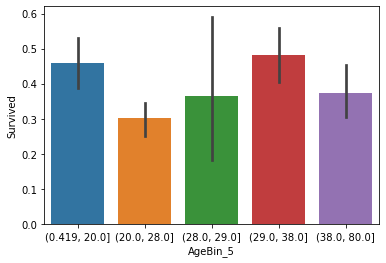

In [58]:
train_data['AgeBin_5'] = pd.qcut(train_data['Age'], 5)
test_data['AgeBin_5'] = pd.qcut(test_data['Age'], 5)
sns.barplot(x='AgeBin_5', y='Survived', data=train_data)
plt.show()

In [59]:
train_data['FareBin_5'] = pd.qcut(train_data['Fare'], 5)
test_data['FareBin_5'] = pd.qcut(test_data['Fare'], 5)

C:\Users\User\AppData\Local\Temp/ipykernel_7000/814246442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FareBin_5'] = pd.qcut(train_data['Fare'], 5)
C:\Users\User\AppData\Local\Temp/ipykernel_7000/814246442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FareBin_5'] = pd.qcut(test_data['Fare'], 5)


In [61]:
label = LabelEncoder()
train_data['AgeBin_Code_5'] = label.fit_transform(train_data['AgeBin_5'])
test_data['AgeBin_Code_5'] = label.fit_transform(test_data['AgeBin_5'])
label = LabelEncoder()
train_data['FareBin_Code_5'] = label.fit_transform(train_data['FareBin_5'])
test_data['FareBin_Code_5'] = label.fit_transform(test_data['FareBin_5'])

C:\Users\User\AppData\Local\Temp/ipykernel_7000/2632672876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['AgeBin_Code_5'] = label.fit_transform(train_data['AgeBin_5'])
C:\Users\User\AppData\Local\Temp/ipykernel_7000/2632672876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['AgeBin_Code_5'] = label.fit_transform(test_data['AgeBin_5'])
C:\Users\User\AppData\Local\Temp/ipykernel_7000/2632672876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

C:\Users\User\AppData\Local\Temp/ipykernel_7000/2875828863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FamilySize'] = train_data.SibSp + train_data.Parch + 1
C:\Users\User\AppData\Local\Temp/ipykernel_7000/2875828863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FamilySize'] = test_data.SibSp + test_data.Parch + 1
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

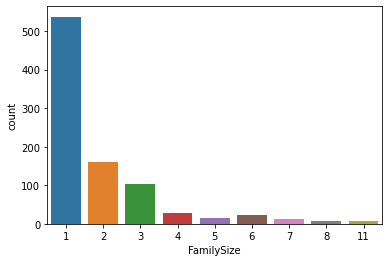

In [63]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch + 1
test_data['FamilySize'] = test_data.SibSp + test_data.Parch + 1
sns.countplot(train_data.FamilySize)
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_7000/3406643204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Alone'] = train_data.FamilySize.map(lambda x: 1 if x == 1 else 0)
C:\Users\User\AppData\Local\Temp/ipykernel_7000/3406643204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Alone'] = test_data.FamilySize.map(lambda x: 1 if x == 1 else 0)


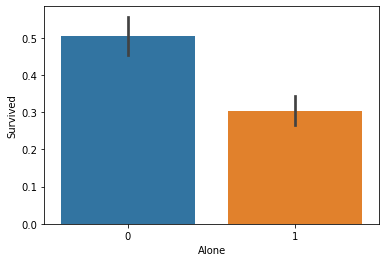

In [70]:
train_data['Alone'] = train_data.FamilySize.map(lambda x: 1 if x == 1 else 0)
test_data['Alone'] = test_data.FamilySize.map(lambda x: 1 if x == 1 else 0)

sns.barplot(x='Alone', y='Survived', data=train_data)
plt.show()


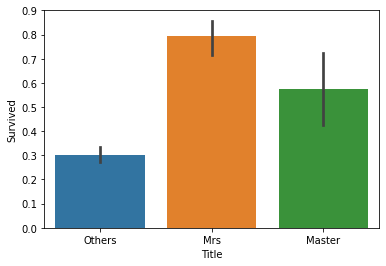

In [73]:
sns.barplot(x='Title', y='Survived', data=train_data)
plt.show()

In [81]:
train_data['Title_Code'] = train_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}).astype('int')

C:\Users\User\AppData\Local\Temp/ipykernel_7000/3285107094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Title_Code'] = train_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}).astype('int')


In [82]:
test_data['Title_Code'] = train_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}).astype('int')

C:\Users\User\AppData\Local\Temp/ipykernel_7000/4038382304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Title_Code'] = train_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}).astype('int')


In [84]:
train_data[['Name', 'Ticket']].sort_values('Name').head(20)

,Name,Ticket
845,"Abbing, Mr. Anthony",C.A. 5547
746,"Abbott, Mr. Rossmore Edward",C.A. 2673
279,"Abbott, Mrs. Stanton (Rosa Hunt)",C.A. 2673
308,"Abelson, Mr. Samuel",P/PP 3381
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",P/PP 3381
365,"Adahl, Mr. Mauritz Nils Martin",C 7076
401,"Adams, Mr. John",341826
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",7546
855,"Aks, Mrs. Sam (Leah Rosen)",392091
207,"Albimona, Mr. Nassef Cassem",2699


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


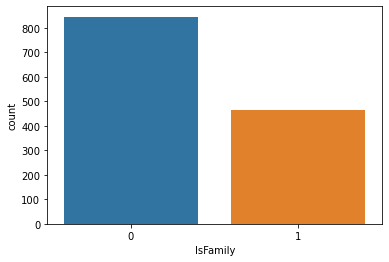

In [87]:
data = train_data.append(test_data)
data['Surname'] = data.Name.str.extract(r'([A-Za-z]+),', expand=False)
data['TixPref'] = data.Ticket.str.extract(r'(.*\d)', expand=False)
data['SurTix'] = data['Surname'] + data['TixPref']
data['IsFamily'] = data.SurTix.duplicated(keep=False)*1
sns.countplot(data.IsFamily)
plt.show()

In [93]:
data['Child'] = data.Age.map(lambda x: 1 if x <=16 else 0)
FamilyWithChild = data[(data.IsFamily==1)&(data.Child==1)]['SurTix'].unique()
len(FamilyWithChild)

66

In [97]:
data['FamilyId'] = 0
x = 1
for tix in FamilyWithChild:
    data.loc[data.SurTix==tix, ['FamilyId']] = x
    x += 1

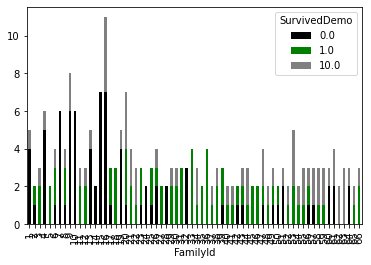

In [103]:
data['SurvivedDemo'] = data['Survived'].fillna(10)
pd.crosstab(data.FamilyId, data.SurvivedDemo).drop([0]).plot(kind='bar', stacked=True, color=['black','g','grey'])
plt.show()

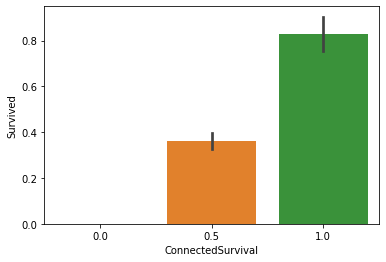

In [106]:
data['ConnectedSurvival'] = 0.5 
Survived_by_FamilyId = data.groupby('FamilyId').Survived.sum()
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        data.loc[data.FamilyId==i, ['ConnectedSurvival']] = 1
    elif Survived_by_FamilyId[i] == 0:
        data.loc[data.FamilyId==i, ['ConnectedSurvival']] = 0
train_data = data[:len(train_data)]
test_data = data[len(train_data):]
sns.barplot(x='ConnectedSurvival', y='Survived', data=train_data)
plt.show()

In [107]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Sex_Code',
       'Embarked_Code', 'AgeBin_5', 'FareBin_5', 'AgeBin_Code_5',
       'FareBin_Code_5', 'FamilySize', 'Alone', 'Title_Code', 'Surname',
       'TixPref', 'SurTix', 'IsFamily', 'Child', 'FamilyId', 'SurvivedDemo',
       'ConnectedSurvival'],
      dtype='object')

In [121]:
X_train = train_data.drop(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Sex', 'SibSp','Ticket', 'Title', 'AgeBin_5', 'FareBin_5', 'FamilySize', 'Surname', 'TixPref', 'SurTix', 'IsFamily', 'Child', 'FamilyId'], axis=1)

In [122]:
X_train

,Survived,Pclass,Sex_Code,Embarked_Code,AgeBin_Code_5,FareBin_Code_5,Alone,Title_Code,SurvivedDemo,ConnectedSurvival
0,0.0,3,0,0,1,0,0,4,0.0,0.5
1,1.0,1,1,1,3,4,0,2,1.0,0.5
2,1.0,3,1,0,1,1,1,4,1.0,0.5
3,1.0,1,1,0,3,4,0,2,1.0,0.5
4,0.0,3,0,0,3,1,1,4,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,0,1,2,1,4,0.0,0.5
887,1.0,1,1,0,0,3,1,4,1.0,0.5
888,0.0,3,1,0,1,3,0,4,0.0,0.0
889,1.0,1,0,1,1,3,1,4,1.0,0.5


In [108]:
y_train = train_data['Survived']

In [109]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [123]:
model = RandomForestClassifier(n_estimators=200, random_state=2)

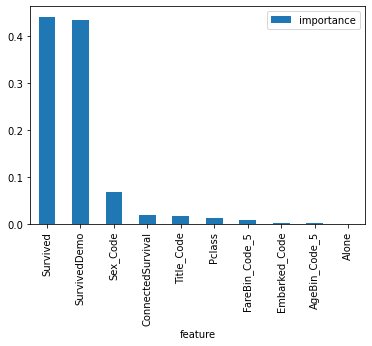

In [126]:
model.fit(X_train,y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar')
plt.show()

In [128]:
finaldata = ['Title_Code', 'Sex_Code', 'ConnectedSurvival', 'Pclass', 'FareBin_Code_5']
finaldata

['Title_Code', 'Sex_Code', 'ConnectedSurvival', 'Pclass', 'FareBin_Code_5']

In [147]:
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy',
 cv=5,
 n_jobs=-1)
gd_sr.fit(X_train[finaldata], y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)


{'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}


In [148]:
model = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion= 'entropy', min_samples_leaf=5, min_samples_split=2, random_state=2)

In [149]:
model

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       n_estimators=500, random_state=2)

In [152]:
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=6)
all_accuracies
all_accuracies.mean()

1.0